In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pysta
import stcl

from stcl import load_centers

import pandas as pd
import os

%load_ext autoreload
%autoreload 2

In [2]:
dataset_name = 20180626
channel_name = "36c"
tap = 8

cluster = np.load("{}_tap{}_cov_classic_cluster_dim2/{}.npz".format(dataset_name, tap, channel_name))
# cluster = np.load("20180626_tap8_cov_classic_cluster_dim2/36c.npz")
#cluster = np.load("20180622_tap8_cov_classic_cluster_dim2/85b.npz")

sta = cluster['sta']
group_centers = cluster['group_centers']

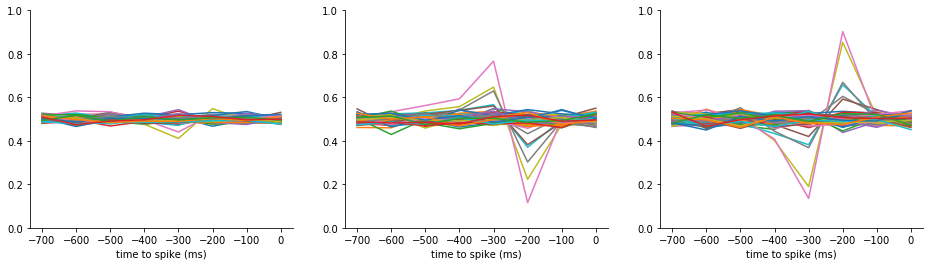

In [3]:
dt = 100

stcl.plot_temporal_profiles(sta, group_centers, tap, dt)

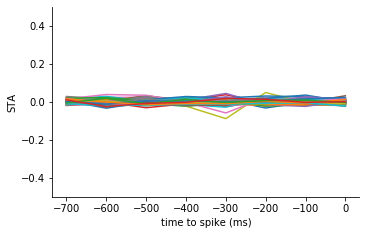

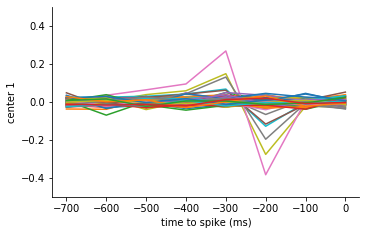

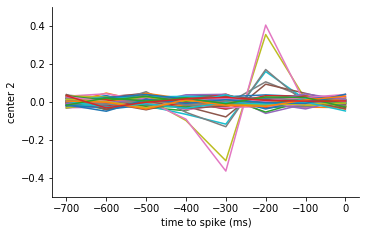

In [4]:
figsize = (5.5,3.5)
plt.figure(figsize=figsize)
pysta.plot_temporal_profile(sta-0.5, tap, dt)
plt.ylabel('STA')
plt.ylim(-0.5,0.5)

plt.savefig("figure/{}_{}_sta_temp.png".format(dataset_name, channel_name))
plt.savefig("figure/{}_{}_sta_temp.pdf".format(dataset_name, channel_name))

plt.figure(figsize=figsize)
pysta.plot_temporal_profile(group_centers[0]-0.5, tap, dt)
plt.ylabel('center 1')
plt.ylim(-0.5,0.5)

plt.savefig("figure/{}_{}_center1_temp.png".format(dataset_name, channel_name))
plt.savefig("figure/{}_{}_center1_temp.pdf".format(dataset_name, channel_name))

plt.figure(figsize=figsize)
pysta.plot_temporal_profile(group_centers[1]-0.5, tap, dt)
plt.ylabel('center 2')
plt.ylim(-0.5,0.5)

plt.savefig("figure/{}_{}_center2_temp.png".format(dataset_name, channel_name))
plt.savefig("figure/{}_{}_center2_temp.pdf".format(dataset_name, channel_name))

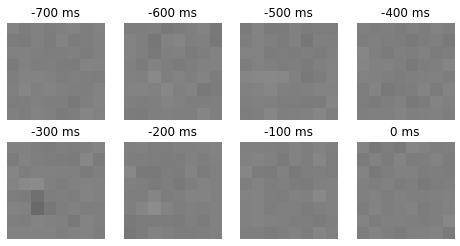

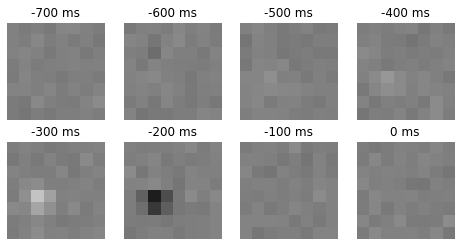

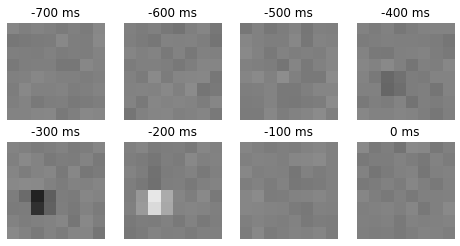

In [5]:
pysta.plot_stim_slices(sta, dt=dt)
plt.savefig("figure/{}_{}_sta.png".format(dataset_name, channel_name))
plt.savefig("figure/{}_{}_sta.pdf".format(dataset_name, channel_name))

pysta.plot_stim_slices(group_centers[0], dt=dt)
plt.savefig("figure/{}_{}_center1.png".format(dataset_name, channel_name))
plt.savefig("figure/{}_{}_center1.pdf".format(dataset_name, channel_name))

pysta.plot_stim_slices(group_centers[1], dt=dt)
plt.savefig("figure/{}_{}_center2.png".format(dataset_name, channel_name))
plt.savefig("figure/{}_{}_center2.pdf".format(dataset_name, channel_name))

## load clustered results

In [6]:
dataset_name = "20180626"

cell_info = pd.read_csv(os.path.join("data", dataset_name + "_cell_type.csv"))
cell_info["dataset_name"] = dataset_name
cell_info.head()

cluster_folder_name = dataset_name + "_tap8_cov_classic_cluster_dim2"
sta, center0, center1 = load_centers(cluster_folder_name, list(cell_info["channel_name"]))

In [7]:
sta.shape

(156, 8, 8, 8)

In [8]:
center0.shape

(156, 8, 8, 8)

In [9]:
center1.shape

(156, 8, 8, 8)

In [10]:
cell_info.shape

(156, 3)

## load and combine all datasets

In [11]:
def code_cell_type(cell_type):
    if cell_type == "ON":
        return 1
    elif cell_type == "OFF":
        return -1

    return np.nan

In [12]:
dim = 2
# dim = 3

stas = list()
centers0 = list()
centers1 = list()
cell_types = list()

cell_infos = list()

for dataset_name in ["20180618", "20180621", "20180626"]:
    
    print(dataset_name)
        
    cell_info = pd.read_csv(os.path.join("data", dataset_name + "_cell_type.csv"))
    cell_info["dataset_name"] = dataset_name
    cell_info.head()
    
    print(len(cell_info))

    cluster_folder_name = dataset_name + "_tap8_cov_classic_cluster_dim{}".format(dim)
    sta, center0, center1 = load_centers(cluster_folder_name, list(cell_info["channel_name"]))
    cell_type = [code_cell_type(c) for c in cell_info["cell_type"]]
    
    print(sta.shape, center0.shape, center1.shape)
    
    stas.append(sta)
    centers0.append(center0)
    centers1.append(center1)
    cell_types.append(cell_type)
    
    cell_infos.append(cell_info)
    
stas = np.concatenate(stas)    
centers0 = np.concatenate(centers0)
centers1 = np.concatenate(centers1)
cell_types = np.concatenate(cell_types)

cell_infos = pd.concat(cell_infos)

20180618
118
(118, 8, 8, 8) (118, 8, 8, 8) (118, 8, 8, 8)
20180621
115
(115, 8, 8, 8) (115, 8, 8, 8) (115, 8, 8, 8)
20180626
156
(156, 8, 8, 8) (156, 8, 8, 8) (156, 8, 8, 8)


In [13]:
stas.shape

(389, 8, 8, 8)

In [14]:
centers0.shape

(389, 8, 8, 8)

In [15]:
centers1.shape

(389, 8, 8, 8)

In [16]:
cell_types.shape

(389,)

/Users/yyoo/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/yyoo/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([169.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  91.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

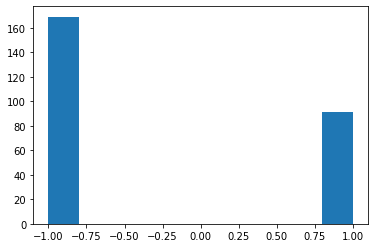

In [17]:
plt.hist(cell_types)

In [18]:
np.savez_compressed("clusters_dim{}".format(dim), stas=stas, centers0=centers0, centers1=centers1, cell_types=cell_types)

# reorder columns
# cell_infos.columns
cell_infos = cell_infos.reindex(columns=['dataset_name', 'channel_name', 'cell_type'])

cell_infos.to_csv("clusters_dim{}.csv".format(dim), index=None)

## test load

In [19]:
np.load("clusters_dim{}.npz".format(dim))["stas"].shape

(389, 8, 8, 8)

In [20]:
np.load("clusters_dim{}.npz".format(dim))["centers0"].shape

(389, 8, 8, 8)

In [21]:
np.load("clusters_dim{}.npz".format(dim))["centers1"].shape

(389, 8, 8, 8)

In [22]:
np.load("clusters_dim{}.npz".format(dim))["cell_types"].shape

(389,)

In [26]:
pd.read_csv("clusters_dim{}.csv".format(dim))

,dataset_name,channel_name,cell_type
0,20180618,12a,OFF
1,20180618,12b,ON
2,20180618,12c,unknown
3,20180618,13a,OFF
4,20180618,13b,ON
...,...,...,...
384,20180626,86c,ON
385,20180626,86d,ON
386,20180626,87a,OFF
387,20180626,87b,ON


## check sum statistics

In [29]:
clustering_result = pd.read_csv("cluster_combined_dim2_spd4.csv")
clustering_result

,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,dataset,cell_type_on_and_off,cell_type_combined
0,14a,5973,ON,25.775064,0.620785,0.571746,0.562778,True,25.702134,15.884281,0.598530,0.401470,-0.206751,20180618,True,ON/OFF
1,17a,5929,unknown,8.452868,0.436700,0.434049,0.430598,True,6.269053,5.988208,0.504045,0.495955,-0.251180,20180618,False,unknown
2,17b,2553,unknown,8.515376,0.570595,0.559954,0.552507,True,5.333542,5.551068,0.495539,0.504461,-0.268871,20180618,False,unknown
3,23a,12115,OFF,22.562123,0.604328,0.517577,0.516272,True,20.522708,11.367329,0.602274,0.397726,-0.002242,20180618,False,OFF
4,23b,4619,ON,11.990694,0.700543,0.608037,0.595794,True,17.952531,17.924992,0.526349,0.473651,-0.357312,20180618,True,ON/OFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,82b,2842,OFF,15.507029,0.798825,0.714066,0.700224,True,14.167554,5.978526,0.597454,0.402546,-0.185087,20180626,False,OFF
167,83a,17646,OFF,20.351671,0.493440,0.462766,0.458015,True,6.770738,17.624590,0.493222,0.506778,-0.096240,20180626,False,OFF
168,86a,3186,ON,19.576154,0.952703,0.766365,0.749286,True,9.892318,19.695189,0.276750,0.723250,0.588351,20180626,False,ON
169,87a,9120,OFF,21.676952,0.590420,0.517161,0.512286,True,19.043271,14.230278,0.600327,0.399673,0.056832,20180626,False,OFF


In [30]:
idx = clustering_result["channel_name"] == '36c'

In [32]:
clustering_result.loc[idx]

,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,dataset,cell_type_on_and_off,cell_type_combined
140,36c,4098,unknown,10.31883,0.798256,0.620102,0.613533,True,18.892517,18.855896,0.524121,0.475879,-0.555696,20180626,True,ON/OFF
